In [126]:
import cv2
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.utils import np_utils

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [127]:
# SEX

model_file = 'alex0sex_nobabes_fold0.h5'
label_file = 'adience/labels_nobabes.csv'
image_file = 'adience/images128rgb.mat'

model = load_model(model_file)
image_mat = sio.loadmat(image_file)
label_df = pd.read_csv(label_file)
image_mat = image_mat['images'][label_df.use==1]
label_df = label_df[label_df.use==1]

Y = np.transpose(np.asarray((label_df['sex_m'], label_df['sex_f'])))
X = image_mat.astype('float32') / 255

In [128]:
model = load_model(model_file)
Z = model.predict(X, verbose=0)
z = np_utils.categorical_probas_to_classes(Z)
y = np_utils.categorical_probas_to_classes(Y)

,0,1
0,92.32,7.68
1,11.29,88.71


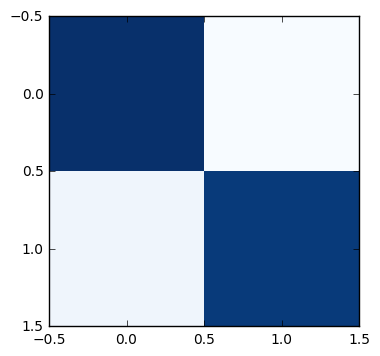

In [132]:
%matplotlib inline
cmat = confusion_matrix(y, z).astype(np.float64)
for row in cmat:
    row /= sum(row)
    
plt.imshow(cmat, interpolation='nearest', cmap='Blues')
pd.DataFrame(np.round((cmat*100), decimals=2))

faces found: 2


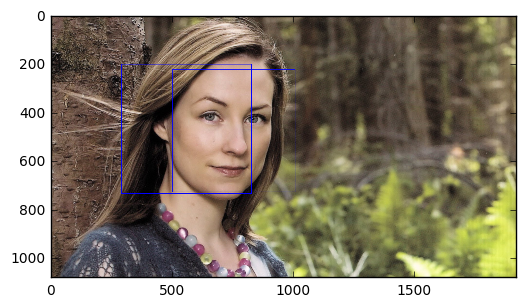

In [133]:
# SAMPLE

image_file = 'sample_woman17.jpg'
scaleFactor=1.1
minNeighbors=3

img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
minSize = img.shape[0]/5
faces = face_cascade.detectMultiScale(gray,
    scaleFactor=scaleFactor, minNeighbors=minNeighbors,
    minSize=(minSize, minSize))
for (ex,ey,ew,eh) in faces:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

%matplotlib inline
print('faces found: '+str(len(faces)))
plt.imshow(img[...,::-1])

[[ m   f ]]
[[ 1.  0.]]


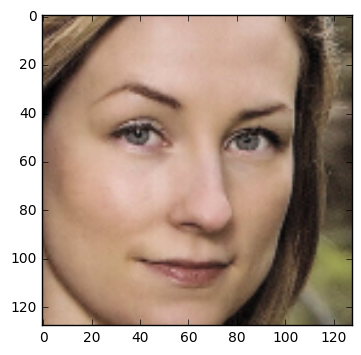

In [134]:
ex, ey, ew, eh = faces[0]
input_size = 128

img = cv2.imread(image_file)
input = cv2.resize(
        src=img[ey:ey+eh,ex:ex+ew],
        dsize=(input_size,input_size),
        interpolation=cv2.INTER_CUBIC)

%matplotlib inline
plt.imshow(input[...,::-1])

input = np.reshape(input, (1, input_size, input_size, 3))
print('[[ m   f ]]')
print(model.predict(input))

In [140]:
# CHECK INCORRECTS

correct = np.zeros(shape=(y.shape[0]))

for i in range(y.shape[0]):
    if (y[i]==z[i]):
        correct[i] = 1
        
print(correct)

[ 1.  1.  1. ...,  1.  1.  1.]


In [128]:
del image_mat

In [4]:
# AGE

model_file = 'model1age_fold0.h5'
label_file = 'adience/labels.csv'
image_file = 'adience/images64g.mat'

model = load_model(model_file)
image_mat = sio.loadmat(image_file)
label_df = pd.read_csv(label_file)
image_mat = image_mat['images'][label_df.use==1]
label_df = label_df[label_df.use==1]

Y = np.transpose(np.asarray((
    label_df['age_class_0'],
    label_df['age_class_1'],
    label_df['age_class_2'],
    label_df['age_class_3'],
    label_df['age_class_4'],
    label_df['age_class_5'],
    label_df['age_class_6'],
    label_df['age_class_7']
)))

X = image_mat.reshape(image_mat.shape[0],
                      image_mat.shape[1],
                      image_mat.shape[2], 1)
X = X.astype('float32') / 255

In [ ]:
model = load_model(model_file)
Z = model.predict(X, verbose=0)
z = np_utils.categorical_probas_to_classes(Z)
y = np_utils.categorical_probas_to_classes(Y)

,0,1,2,3,4,5,6,7
0,66.16,24.59,3.94,1.24,2.47,1.24,0.14,0.23
1,5.18,73.31,14.31,2.99,2.79,1.27,0.00,0.15
2,0.37,4.72,74.30,4.95,13.08,2.24,0.14,0.19
3,0.40,1.14,9.21,55.65,29.44,3.97,0.00,0.20
4,0.42,0.96,7.60,5.55,76.73,8.10,0.31,0.33
5,0.22,0.91,5.99,5.38,34.26,51.72,0.78,0.74
6,0.48,1.55,6.67,7.86,36.90,24.17,19.40,2.98
7,0.52,0.91,4.81,5.19,24.55,21.17,2.08,40.78


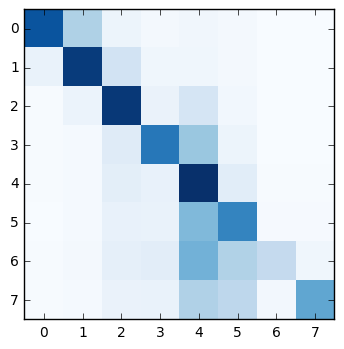

In [10]:
%matplotlib inline
cmat = confusion_matrix(y, z).astype(np.float64)
for row in cmat:
    row /= sum(row)
    
plt.imshow(cmat, interpolation='nearest', cmap='Blues')
pd.DataFrame(np.round((cmat*100), decimals=2))